In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Создаем среду FrozenLake 4x4
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode='rgb_array')  # Отключаем скольжение для простоты

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env.reset()
img = np.array(env.render())[0]

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

In [ ]:
img.shape

(256, 256, 3)

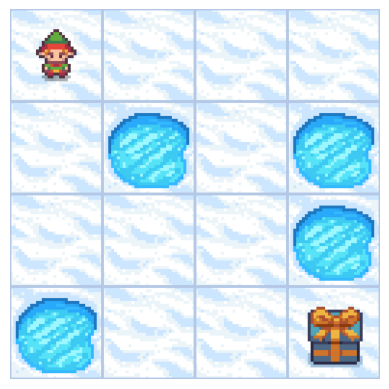

In [ ]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
# Параметры обучения
alpha = 0.8         # Скорость обучения
gamma = 0.95        # Коэффициент дисконтирования
epsilon = 1.0       # Начальная вероятность исследования
epsilon_decay = 0.999  # Скорость уменьшения epsilon
n_episodes = 10_000  # Количество эпизодов

In [ ]:
# Инициализация Q-таблицы
n_states = env.observation_space.n
n_actions = env.action_space.n
q_table = np.zeros((n_states, n_actions))

In [ ]:
# Статистика обучения
episode_rewards = []

In [ ]:
# Обучение
for episode in range(n_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        # ε-жадный выбор действия
        if np.random.random() < epsilon:
            action = env.action_space.sample()  # Случайное действие
        else:
            action = np.argmax(q_table[state])

        # Шаг в среде
        next_state, reward, done, info = env.step(action)

        # Обновление Q-таблицы
        q_table[state][action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state][action]
        )

        state = next_state
        total_reward += reward

    # Уменьшаем epsilon
    epsilon = max(0.01, epsilon * epsilon_decay)
    episode_rewards.append(total_reward)

    if episode % 1000 == 0:
        print(f"Episode: {episode}, Reward: {total_reward}, Epsilon: {epsilon:.3f}")

Episode: 0, Reward: 0.0, Epsilon: 0.999
Episode: 1000, Reward: 1.0, Epsilon: 0.367
Episode: 2000, Reward: 1.0, Epsilon: 0.135
Episode: 3000, Reward: 1.0, Epsilon: 0.050
Episode: 4000, Reward: 1.0, Epsilon: 0.018
Episode: 5000, Reward: 1.0, Epsilon: 0.010
Episode: 6000, Reward: 1.0, Epsilon: 0.010
Episode: 7000, Reward: 1.0, Epsilon: 0.010
Episode: 8000, Reward: 1.0, Epsilon: 0.010
Episode: 9000, Reward: 1.0, Epsilon: 0.010


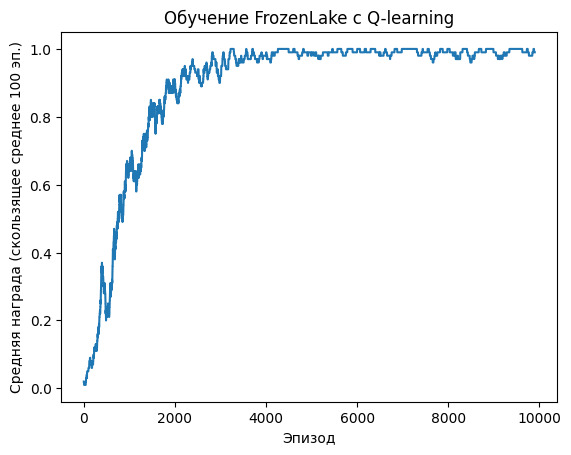

In [ ]:
# Визуализация результатов
plt.plot(np.convolve(episode_rewards, np.ones(100)/100, mode='valid'))
plt.xlabel('Эпизод')
plt.ylabel('Средняя награда (скользящее среднее 100 эп.)')
plt.title('Обучение FrozenLake с Q-learning')
plt.show()


Тестирование обученного агента:


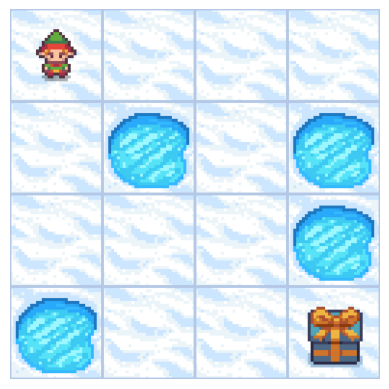

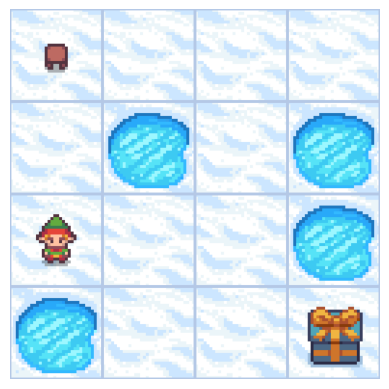

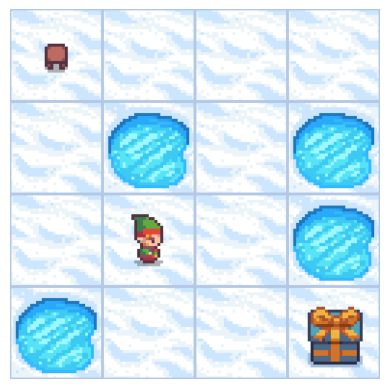

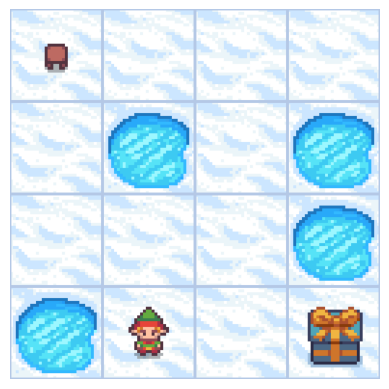

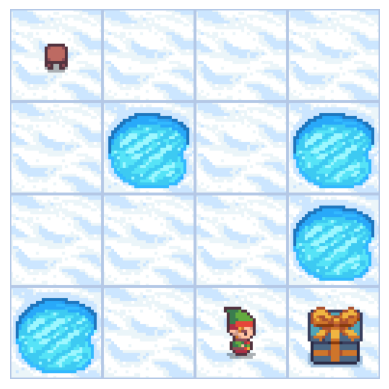

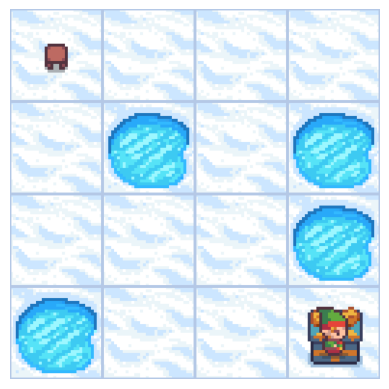

In [ ]:
# Тестирование обученного агента
state = env.reset()
done = False

print("\nТестирование обученного агента:")
while not done:
    action = np.argmax(q_table[state])
    next_state, reward, done, info = env.step(action)
    img = np.array(env.render())[0]
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    state = next_state

env.close()

In [ ]:
env.observation_space

Discrete(16)

# Собственная среда

1. Общее описание среды

  Карта: 200x200 пикселей с препятствиями (стены задаются маской или координатами).

  Агенты:

  * Преследователь (Agent 1) — цель: догнать Agent 2.

  * Убегающий (Agent 2) — цель: избежать поимки.

  Симметрия: Оба агента имеют одинаковые параметры и возможности.

  Время: Эпизод длится max_steps=500 шагов.

1. Компоненты состояния (нормализованные до [0, 1] или [-1, 1]):

  2.1. Позиция агента (x, y) — текущие координаты (дискретно, от 0 до 200).

  2.2. Направление взгляда  — угол направления (angle).

  2.3. Расстояние до противника (если в поле зрения) (дискретно, от 0 до 50).

  2.4. Угол до противника относительно направления агента (дискретно, от 45 до -45).

  2.5. Детекция стен в 10 направлениях (лучи от -45 до +45 (10 шт) относительно взгляда направления (взгляд находится по центру. Каждая детекция дискретна (от 0 до 50). 50 если стены нет).

  2.6. Оставшееся время (от 0 до 500, дискретно).

  Пример:

    [x = 0,

    y = 0,

    dx = -1,

    dy = -1,

    dist = 0,

    angle = 0,

    walls = (0, 0, 0, 0, 0, 0, 0, 0) ,

    t = 0]

    len = 15

1. Действия

  3.1.1 Движение вперед (ускорение).

  3.1.2 Стоп (сброс скорости и ускорения). Удален

  3.1.3. Просто движение.

  3.2.1 Поворот налево (+10°).

  3.2.2 Поворот направо (-10°).

  3.2.3 Резкий разворот (180°), скорость и ускорение сбрасываются.
  
  3.2.4 Не менять поворт


4. Механика поля зрения

  Конус видимости: Угол 90°, радиус 50 пикселей.

  Обнаружение противника:

  Если противник в конусе, агент получает его относительные координаты.

  В противном случае — нулевые значения в компонентах 3-4.

5. Награды (Reward)

  5.1. Для преследователя (Agent 1):

    * +10 за сокращение дистанции к цели.

    * -5 за увеличение дистанции.

    * +100 за поимку (дистанция < 10px).

    * -20 за столкновение со стеной.

  5.2. Для убегающего (Agent 2):

  * +10 за увеличение дистанции.

  * -5 за сокращение дистанции.

  * +200 за выживание до конца эпизода.

  * -20 за столкновение со стеной.

  5.3. Общие:

  * -1 за каждый шаг (штраф за время).


In [ ]:
import gym
from gym import spaces
import numpy as np
import math
import random
import matplotlib.patches as patches

In [ ]:
from matplotlib import animation
from IPython.display import HTML

In [ ]:
class Agent():

  def __init__(self, x, y, angle):
    self.x = x
    self.y = y
    self.angle = angle
    self.velocity = 0
    self.acceleration = 0
    self.prev_x = x
    self.prev_y = y
    self.prev_act_1 = 0
    self.prev_act_2 = 0
    self.penalty_for_repeat_action = 0

  def get_pos(self):
    return self.x, self.y

In [ ]:
class ChaseEnv(gym.Env):
    def __init__(self):
        self.map_size = 200
        self.max_steps = 500
        self.vision_cone = 90  # градусы
        self.vision_radius = 50

        self.frames = []  # список кадров для анимации

        # Пространства состояний и действий
        self.observation_space = spaces.Tuple((
        # Для агента 1
        spaces.Box(
            low=np.array([
                0,    # x
                0,    # y
                0,    # угол (angle), от 0 до 360
                0,    # расстояние до противника
                round(0 - self.vision_cone/2),   # угол до противника
                *[0]*10,   # 10 направлений для стен
                0     # оставшееся время
            ], dtype=np.int32),
            high=np.array([
                self.map_size,   # x
                self.map_size,   # y
                360,   # угол
                self.vision_radius,    # макс. расстояние до противника
                round(0 + self.vision_cone/2),    # макс. угол до противника
                *[self.vision_radius]*10,  # макс. дистанция для стен
                self.max_steps  # макс. оставшееся время
            ], dtype=np.int32),
            dtype=np.int32
        ),

        # Для агента 2 (аналогично агенту 1)
        spaces.Box(
            low=np.array([
                0,    # x
                0,    # y
                0,    # угол (angle)
                0,    # расстояние до противника
                round(0 - self.vision_cone/2),   # угол до противника
                *[0]*10,   # 10 направлений для стен
                0     # оставшееся время
            ], dtype=np.int32),
            high=np.array([
                self.map_size,   # x
                self.map_size,   # y
                360,   # угол
                self.vision_radius,    # макс. расстояние до противника
                round(0 + self.vision_cone/2),    # макс. угол до противника
                *[self.vision_radius]*10,  # макс. дистанция для стен
                self.max_steps  # макс. оставшееся время
            ], dtype=np.int32),
            dtype=np.int32
        )
        ))
        self.action_space = spaces.Tuple((spaces.Discrete(2), spaces.Discrete(4)))
        self.observation_space_n_for_agent = (self.map_size+1) * (self.map_size+1) * 361 * (self.vision_radius+1) * (self.vision_cone+1) * ((self.vision_radius+1) ** 10) * 501
        # Инициализация агентов и стен
        self.walls = self._generate_walls()
        self.width_wall = 3
        self.size_agent = 5
        self.reset()


    def reset(self):
        # Случайные стартовые позиции вне стен
        x_1, y_1, x_2, y_2 = self._generate_start_pos()
        self.agent1 = Agent(x_1, y_1, random.randint(0, 360))
        self.agent2 = Agent(x_2, y_2, random.randint(0, 360))

        self.steps_left = 0
        self.prev_distance = math.hypot(x_1 - x_2, y_1 - y_2)
        return self._get_obs()

    def _get_obs(self):
      return (self._get_obs_for_agent(self.agent1), self._get_obs_for_agent(self.agent2))

    def _get_obs_for_agent(self, agent):
        # Дискретная позиция
        x = int(agent.x)
        y = int(agent.y)

        # Направление (в градусах от 0 до 360)
        angle = int(agent.angle % 360)

        # Координаты противника
        target = self.agent2 if agent == self.agent1 else self.agent1
        dx = target.x - agent.x
        dy = target.y - agent.y
        distance_to_target = int(math.hypot(dx, dy))

        # Угол до противника (если виден)
        angle_to_target_discrete = 0
        if self._is_visible(agent.get_pos(), target.get_pos()):
            angle_to_target = math.degrees(math.atan2(dy, dx))
            relative_angle = (angle_to_target - agent.angle + 360) % 360
            if relative_angle > 180:
                relative_angle -= 360  # Приводим к [-180, 180]

            # Ограничиваем в пределах [-vision_cone/2, +vision_cone/2]
            if abs(relative_angle) <= self.vision_cone / 2:
                angle_to_target_discrete = int(round(relative_angle))
            else:
                distance_to_target = self.vision_radius  # Цель вне поля зрения
                angle_to_target_discrete = 0
        else:
            distance_to_target = self.vision_radius  # не видит
            angle_to_target_discrete = 0

        # Детекция стен в 10 направлениях
        wall_dists = []
        for i in range(10):
            offset = -self.vision_cone / 2 + (self.vision_cone / 9) * i
            ray_angle = (agent.angle + offset) % 360
            dist = self._cast_ray(agent.x, agent.y, ray_angle)  # расстояние до стены
            wall_dists.append(int(min(dist, self.vision_radius)))  # обрезаем максимумом 50

        # Оставшееся время (целое число от 0 до max_steps)
        time_left = int(self.steps_left)

        return np.array([
            x, y,
            angle,
            distance_to_target,
            angle_to_target_discrete,
            *wall_dists,
            time_left
        ], dtype=np.int32)

    def step(self, actions):
      self.steps_left +=1
      # Обновление состояний агентов
      ran_into_wall_1 = self._move_agent(self.agent1, actions[0]) # To-Do: _move_agent
      ran_into_wall_2 = self._move_agent(self.agent2, actions[1]) # To-Do: _move_agent

      # Проверка окончания эпизода
      done = math.hypot(self.agent1.x-self.agent2.x, self.agent1.y-self.agent2.y) < self.size_agent*2 or (self.steps_left >= self.max_steps)
      rewards = self._calculate_rewards(done, ran_into_wall_1, ran_into_wall_2) # To-Do: _calculate_rewards

      return self._get_obs(), rewards, done, {}


    def render(self, to_draw):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.imshow(~self.walls, cmap='gray', origin='lower')

        def draw_agent(agent, color):
            x, y = agent.x, agent.y

            # Квадрат агента
            square = patches.Rectangle((x - self.size_agent/2, y - self.size_agent/2), self.size_agent, self.size_agent, linewidth=1,
                                      edgecolor=color, facecolor=color)
            ax.add_patch(square)

            # Красная линия направления
            angle_rad = math.radians(agent.angle)
            dx = self.vision_radius * math.cos(angle_rad)
            dy = self.vision_radius * math.sin(angle_rad)
            ax.plot([x, x + dx], [y, y + dy], color='red', alpha=0.5)

            # Жёлтый угол обзора
            wedge = patches.Wedge(
                center=(x, y),
                r=self.vision_radius,
                theta1=agent.angle - self.vision_cone/2,
                theta2=agent.angle + self.vision_cone/2,
                color='yellow',
                alpha=0.5
            )
            ax.add_patch(wedge)

        draw_agent(self.agent1, 'green')
        draw_agent(self.agent2, 'blue')

        ax.set_xlim(0, self.map_size)
        ax.set_ylim(0, self.map_size)
        ax.set_aspect('equal')
        ax.axis('off')

        # --- Получаем изображение как массив ---
        fig.canvas.draw()
        image = np.array(fig.canvas.renderer.buffer_rgba())
        self.frames.append(image)

        # --- Если to_draw=True, отобразить кадр ---
        if to_draw:
            plt.show()
        else:
            plt.close(fig)

    def _generate_walls(self) -> np.array:
      '''
      Генерирует карту стен.

      Аргументы:
        нет
      Возвращаемое значение:
        np.array((self.map_size, self.map_size), dtype=bool)
      '''

      grid = np.zeros((self.map_size, self.map_size), dtype=bool)

      # 1. Стены по периметру (толщина 3 пикселя)
      grid[:3, :] = True         # Верхняя стена
      grid[-3:, :] = True        # Нижняя стена
      grid[:, :3] = True         # Левая стена
      grid[:, -3:] = True        # Правая стена

      # 2. Внутренние структуры
      def add_wall(x1, y1, x2, y2):
          grid[y1:y2+1, x1:x2+1] = True

      add_wall(1, 15, 95, 15)
      add_wall(104, 15, 198, 15)
      add_wall(1, 184, 95, 184)
      add_wall(104, 184, 198, 184)

      add_wall(34, 34, 34, 34)
      add_wall(165, 34, 165, 34)

      add_wall(56, 56, 56, 56)
      add_wall(143, 56, 143, 56)

      add_wall(78, 78, 78, 78)
      add_wall(121, 78, 121, 78)

      add_wall(78, 121, 78, 121)
      add_wall(121, 121, 121, 121)

      add_wall(56, 143, 56, 143)
      add_wall(143, 143, 143, 143)

      add_wall(34, 165, 34, 165)
      add_wall(165, 165, 165, 165)

      add_wall(44, 34, 155, 34)
      add_wall(44, 165, 155, 165)

      add_wall(66, 56, 133, 56)
      add_wall(66, 143, 133, 143)

      add_wall(88, 78, 111, 78)
      add_wall(88, 121, 111, 121)

      add_wall(34, 44, 34, 155)
      add_wall(165, 44, 165, 155)

      add_wall(56, 66, 56, 133)
      add_wall(143, 66, 143, 133)

      add_wall(78, 88, 78, 111)
      add_wall(121, 88, 121, 111)

      return grid

    def _generate_start_pos(self) -> tuple[int, int, int, int]:
        """Возвращает две валидные позиции далеко друг от друга"""
        size = self.walls.shape[0]
        buffer = self.size_agent + 3  # Минимальное расстояние от стен

        # Проверка валидности позиции
        def is_valid(x, y):
            x_min = max(0, x - self.size_agent)
            x_max = min(size, x + self.size_agent)
            y_min = max(0, y - self.size_agent)
            y_max = min(size, y + self.size_agent)
            return not self.walls[y_min:y_max, x_min:x_max].any()

        # Позиции для нашей карты
        pos1 = (8, 8)    # Левая верхняя зона
        pos2 = (191, 191)  # Правая нижняя зона

        # Проверка выбранных позиций
        assert is_valid(*pos1), "Position 1 is invalid!"
        assert is_valid(*pos2), "Position 2 is invalid!"

        return pos1[0], pos1[1], pos2[0], pos2[1]

    def _is_visible(self, pos_observer, pos_target):
      angle = math.degrees(math.atan2(pos_target[1]-pos_observer[1],
                                pos_target[0]-pos_observer[0]))
      return (abs(angle) < self.vision_cone/2) and (math.hypot(pos_target[1]-pos_observer[1], pos_target[0]-pos_observer[0]) <self.vision_radius)

    def _cast_ray(self, x: float, y: float, angle_deg: float) -> float:
      """Оптимизированная версия с алгоритмом DDA."""
      angle_rad = math.radians(angle_deg)
      dx = math.cos(angle_rad)
      dy = math.sin(angle_rad)

      # Инициализация DDA
      step_size = 0.1  # Точность проверки (пикселей на шаг)
      distance = 0.0

      while distance < self.vision_radius:
          # Текущая проверяемая позиция
          current_x = x + dx * distance
          current_y = y + dy * distance

          # Выход за границы
          if (current_x < 0 or current_x >= self.map_size or
              current_y < 0 or current_y >= self.map_size):
              return self.vision_radius

          # Проверка стены в текущей клетке
          ix, iy = int(current_x), int(current_y)
          if self.walls[iy][ix]:
              return min(distance, self.vision_radius)

          distance += step_size

      return self.vision_radius

    def _move_agent(self, agent, actions):
      act1, act2 = actions

      # --- Обработка act2: повороты ---
      if act2 == 0:  # Поворот налево
          agent.angle = (agent.angle + 10) % 360
      elif act2 == 1:  # Поворот направо
          agent.angle = (agent.angle - 10) % 360
      elif act2 == 2:  # Резкий разворот
          agent.angle = (agent.angle + 180) % 360
          agent.velocity = 0
          agent.acceleration = 0

      # --- Обработка act1: движение / стоп ---
      if act1 == 0:  # Движение вперёд
        agent.acceleration = 1  # Можно настроить под конкретную задачу
        agent.velocity = min(agent.velocity + agent.acceleration, 3)

          # --- Вычисление движения ---
      rad_angle = math.radians(agent.angle)
      dx = math.cos(rad_angle)
      dy = math.sin(rad_angle)

      if agent.prev_act_1 == act1:
        agent.penalty_for_repeat_action -=1
      agent.prev_act_1 = act1
      if agent.prev_act_2 == act2:
        agent.penalty_for_repeat_action -=1
      agent.prev_act_2 = act2
      # Движение с шагами по единичкам до max velocity
      steps = int(agent.velocity)
      remainder = agent.velocity - steps

      new_x, new_y = agent.x, agent.y
      moved = False

      # Шаг за шагом до максимальной целой части скорости
      for _ in range(steps):
        test_x = new_x + dx
        test_y = new_y + dy
        grid_x = int(round(test_x))
        grid_y = int(round(test_y))
        if 0 <= grid_x < self.map_size and 0 <= grid_y < self.map_size and not self.walls[grid_y, grid_x]:
          new_x, new_y = test_x, test_y
          moved = True
        else:
          moved = False
          break  # Стенка — дальше не идём

      new_x, new_y = round(new_x), round(new_y)
      # Последний дробный шаг
      if remainder > 0:
        test_x = new_x + dx * remainder
        test_y = new_y + dy * remainder
        grid_x = int(round(test_x))
        grid_y = int(round(test_y))
        if 0 <= grid_x < self.map_size and 0 <= grid_y < self.map_size and not self.walls[grid_y, grid_x]:
          new_x, new_y = test_x, test_y
          moved = True
        else:
          moved = False

      new_x, new_y = round(new_x), round(new_y)

      # Обновляем позицию
      agent.prev_x = agent.x
      agent.prev_y = agent.y
      agent.x = new_x
      agent.y = new_y

      # Если не сдвинулся совсем — врезался в стену
      if not moved:
        agent.velocity = 0
        agent.acceleration = 0

      return moved

    def _calculate_rewards(self, done, ran_into_wall_1, ran_into_wall_2):
      """
      Возвращает кортеж: (награда для преследователя, награда для убегающего)
      """
      reward_1 = 0  # для преследователя
      reward_2 = 0  # для убегающего

      # Штраф за столкновение со стенкой
      if ran_into_wall_1:
          reward_1 -= 20
      if ran_into_wall_2:
          reward_2 -= 20

      reward_1 -= self.agent1.penalty_for_repeat_action
      self.agent1.penalty_for_repeat_action = 0
      reward_2 -= self.agent2.penalty_for_repeat_action
      self.agent2.penalty_for_repeat_action = 0

      # Получаем текущую и предыдущую дистанции между агентами
      prev_distance = self.prev_distance  # должна сохраняться на предыдущем шаге
      curr_distance = math.hypot(self.agent1.x-self.agent2.x, self.agent1.y-self.agent2.y)

      # Изменение дистанции: положительное — расстояние увеличилось
      delta = curr_distance - prev_distance

      if delta < 0:
          reward_1 += 10  # преследователь сократил дистанцию
          reward_2 -= 5   # убегающий потерял дистанцию
      elif delta > 0:
          reward_1 -= 5
          reward_2 += 10

      # Награды за финальные состояния
      if done:
          if curr_distance < 10:  # Поимка
              reward_1 += 100
          else:  # Успешное бегство
              reward_2 += 200

      # Общий штраф за шаг
      reward_1 -= 1
      reward_2 -= 1

      if self.agent1.x - self.agent1.prev_x <= 1 or self.agent1.y - self.agent1.prev_y <= 1:
        reward_1 -=10

      if self.agent2.x - self.agent2.prev_x <= 1 or self.agent2.y - self.agent2.prev_y <= 1:
        reward_2 -=10

      # Обновляем prev_distance для следующего шага
      self.prev_distance = curr_distance

      return reward_1, reward_2

    def render_animation(self, interval=200):
      fig = plt.figure(figsize=(6, 6))
      im = plt.imshow(self.frames[0])

      def update(i):
          im.set_data(self.frames[i])
          return [im]

      anim = animation.FuncAnimation(
          fig, update, frames=len(self.frames), interval=interval, blit=True)
      plt.close(fig)
      return HTML(anim.to_jshtml())

In [ ]:
chase = ChaseEnv()

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


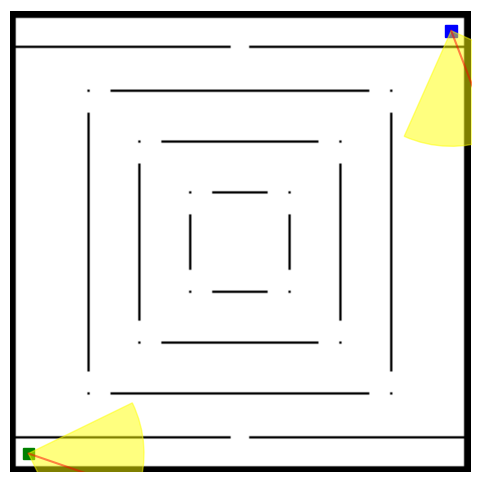

In [ ]:
chase.render(True)

In [ ]:
chase.step(((0, 3),(0, 3)))

((array([  9,   8, 341,  50,   0,   5,   6,   7,   8,  12,  20,  50,  50,
          25,  15,   1], dtype=int32),
  array([191, 190, 291,  50,   0,   5,   5,   5,   5,   5,   5,   6,   7,
           7,   6,   1], dtype=int32)),
 (-20, -35),
 False,
 {})

In [ ]:
chase.agent1.acceleration

1

In [ ]:
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
# Параметры
GAMMA = 0.99
LR = 1e-3
BATCH_SIZE = 128
MEMORY_SIZE = 10_000
EPSILON_START = 1
EPSILON_END = 0.05
EPSILON_DECAY = 0.995
TARGET_UPDATE = 10

In [ ]:
# Сеть
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128), nn.ReLU(),
            nn.Linear(128, 128), nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
# Память
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, *transition):
        self.buffer.append(tuple(transition))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        return zip(*batch)

    def __len__(self):
        return len(self.buffer)

In [ ]:
# Получение действия с эпсилон-жадной стратегией
def select_action(state, policy_net, epsilon, action_space):
    if random.random() < epsilon:
        act1 = random.randint(0, 1)
        act2 = random.randint(0, 3)
        return (act1, act2)
    else:
        with torch.no_grad():
            q_values = policy_net(torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0))
            best_idx = q_values.argmax().item()
            return (best_idx // 4, best_idx % 4)  # 2x4 действий = 6 возможных

In [ ]:
# Обновление сети
def train_step(policy_net, target_net, memory, optimizer):
    if len(memory) < BATCH_SIZE:
        return

    states, actions, rewards, next_states, dones = memory.sample(BATCH_SIZE)

    states = torch.tensor(states, dtype=torch.float32, device=device)
    next_states = torch.tensor(next_states, dtype=torch.float32, device=device)
    rewards = torch.tensor(rewards, dtype=torch.float32, device=device)
    dones = torch.tensor(dones, dtype=torch.float32, device=device)

    actions_idx = torch.tensor([a[0] * 4 + a[1] for a in actions], device=device)  # 2x4

    q_values = policy_net(states).gather(1, actions_idx.unsqueeze(1)).squeeze()
    next_q_values = target_net(next_states).max(1)[0].detach()
    expected_q = rewards + (1 - dones) * GAMMA * next_q_values

    loss = nn.MSELoss()(q_values, expected_q)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
from time import perf_counter_ns

In [ ]:
statistics = {
    'Подготовка': [],
    'Выбор деййствий': [],
    'На шаг в среде': [],
    'Обучение': [],
    'Обнавление целевый сетей': [],
    'Эпизод': [],
     'Agent1 Reward': [],
    'Agent2 Reward': [],
    'action_1_1': [],
    'action_1_2': [],
    'action_2_1': [],
    'action_2_2': [],
}

In [ ]:
# Обучение
def train(env, episodes=500, policy_net1 = None, policy_net2 = None):
    start = perf_counter_ns()
    obs_size = env.observation_space[0].shape[0]
    n_actions = 8  # 3 (движения) * 4 (повороты)

    # Для агента 1
    policy_net1 = DQN(obs_size, n_actions).to(device) if policy_net1 is None else policy_net1
    target_net1 = DQN(obs_size, n_actions).to(device)
    target_net1.load_state_dict(policy_net1.state_dict())
    optimizer1 = optim.Adam(policy_net1.parameters(), lr=LR)
    memory1 = ReplayBuffer(MEMORY_SIZE)

    # Для агента 2
    policy_net2 = DQN(obs_size, n_actions).to(device) if policy_net2 is None else policy_net2
    target_net2 = DQN(obs_size, n_actions).to(device)
    target_net2.load_state_dict(policy_net2.state_dict())
    optimizer2 = optim.Adam(policy_net2.parameters(), lr=LR)
    memory2 = ReplayBuffer(MEMORY_SIZE)

    epsilon = EPSILON_START
    end = perf_counter_ns()
    statistics['Подготовка'].append(end - start)

    for episode in range(episodes):
        start_eps = perf_counter_ns()
        obs = env.reset()
        done = False
        total_reward1 = 0
        total_reward2 = 0

        while not done:
            start_choise_act = perf_counter_ns()
            action1 = select_action(obs[0], policy_net1, epsilon, env.action_space)
            statistics['action_1_1'].append(action1[0])
            statistics['action_1_2'].append(action1[1])
            action2 = select_action(obs[1], policy_net2, epsilon, env.action_space)
            statistics['action_2_1'].append(action2[0])
            statistics['action_2_2'].append(action2[1])
            end_choise_act = perf_counter_ns()
            statistics['Выбор деййствий'].append(end_choise_act - start_choise_act)

            start_step = perf_counter_ns()
            next_obs, (reward1, reward2), done, _ = env.step((action1, action2))
            end_step = perf_counter_ns()
            statistics['На шаг в среде'].append(end_step - start_step)

            memory1.push(obs[0], action1, reward1, next_obs[0], done)
            memory2.push(obs[1], action2, reward2, next_obs[1], done)

            start_train_step = perf_counter_ns()
            train_step(policy_net1, target_net1, memory1, optimizer1)
            train_step(policy_net2, target_net2, memory2, optimizer2)
            end_train_step = perf_counter_ns()
            statistics['Обучение'].append(end_train_step - start_train_step)

            obs = next_obs
            total_reward1 += reward1
            total_reward2 += reward2

        if episode % TARGET_UPDATE == 0:
            start_load_dict = perf_counter_ns()
            target_net1.load_state_dict(policy_net1.state_dict())
            target_net2.load_state_dict(policy_net2.state_dict())
            end_load_dict = perf_counter_ns()
            statistics['Обнавление целевый сетей'].append(end_load_dict - start_load_dict)

        epsilon = max(EPSILON_END, epsilon * EPSILON_DECAY)
        end_eps = perf_counter_ns()
        statistics['Эпизод'].append (end_eps - start_eps)

        print(f"Episode {episode}: Agent1 Reward = {total_reward1}, Agent2 Reward = {total_reward2}")
        statistics['Agent1 Reward'].append(total_reward1)
        statistics['Agent2 Reward'].append(total_reward2)

    return policy_net1, policy_net2

In [ ]:
net_1, net_2 = train(chase, episodes = 1_000) # policy_net1 = net_1, policy_net2 = net_2

<ipython-input-16-39af8d0b613a>:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  states = torch.tensor(states, dtype=torch.float32, device=device)


Episode 0: Agent1 Reward = -9468, Agent2 Reward = -10023
Episode 1: Agent1 Reward = -9675, Agent2 Reward = -9719
Episode 2: Agent1 Reward = -9805, Agent2 Reward = -8972
Episode 3: Agent1 Reward = -9061, Agent2 Reward = -9065
Episode 4: Agent1 Reward = -10411, Agent2 Reward = -9601
Episode 5: Agent1 Reward = -9599, Agent2 Reward = -9520
Episode 6: Agent1 Reward = -9080, Agent2 Reward = -8507
Episode 7: Agent1 Reward = -8567, Agent2 Reward = -10286
Episode 8: Agent1 Reward = -8581, Agent2 Reward = -8564
Episode 9: Agent1 Reward = -9268, Agent2 Reward = -9754
Episode 10: Agent1 Reward = -9707, Agent2 Reward = -8942
Episode 11: Agent1 Reward = -8611, Agent2 Reward = -8781
Episode 12: Agent1 Reward = -8954, Agent2 Reward = -9617
Episode 13: Agent1 Reward = -9024, Agent2 Reward = -9381
Episode 14: Agent1 Reward = -9427, Agent2 Reward = -9018
Episode 15: Agent1 Reward = -9982, Agent2 Reward = -8809
Episode 16: Agent1 Reward = -8374, Agent2 Reward = -9187
Episode 17: Agent1 Reward = -8778, Age

In [ ]:
from collections import Counter

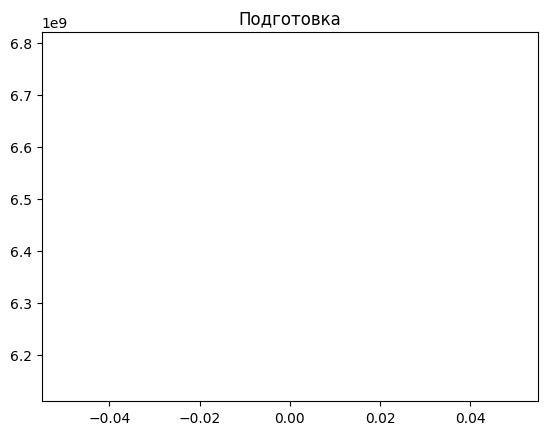

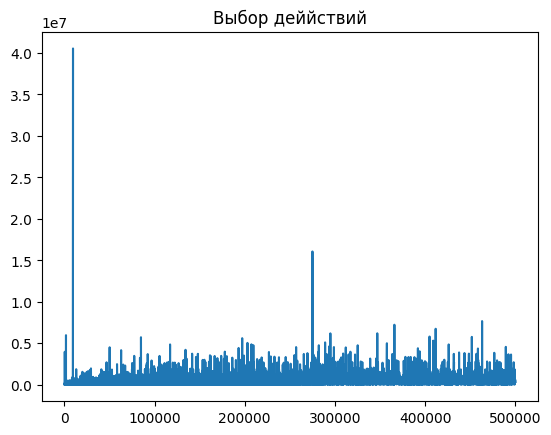

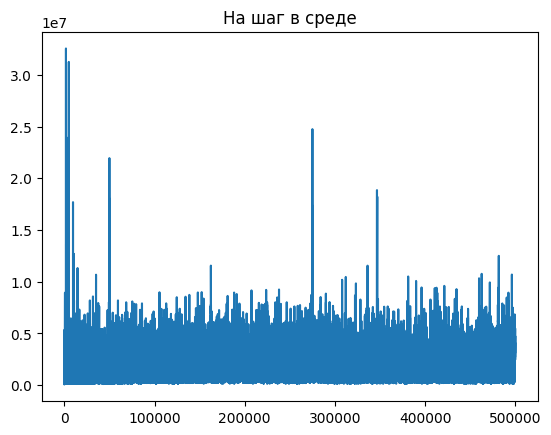

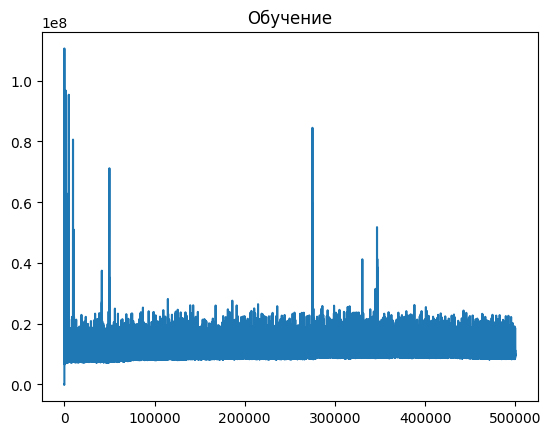

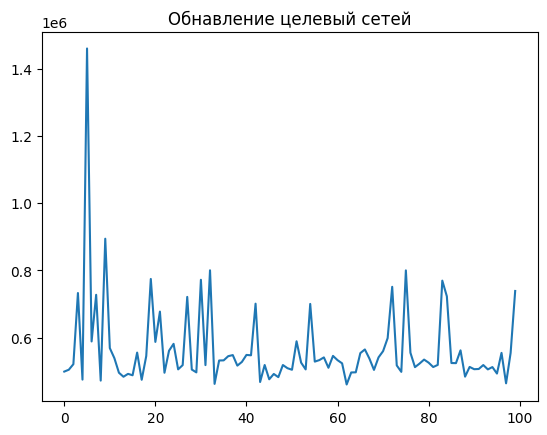

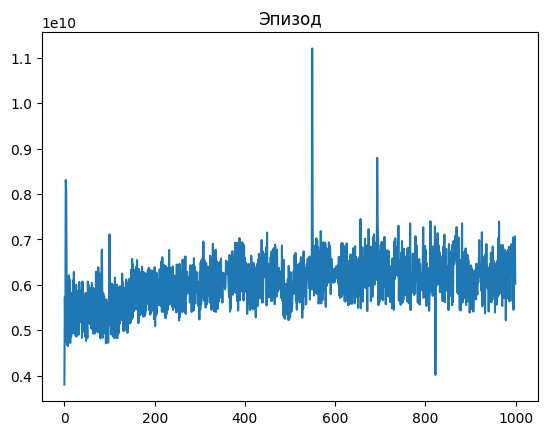

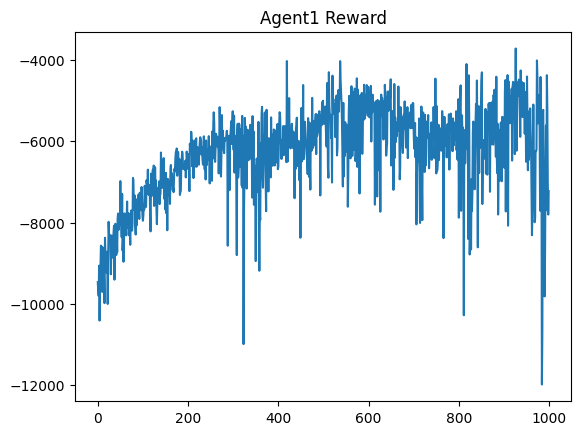

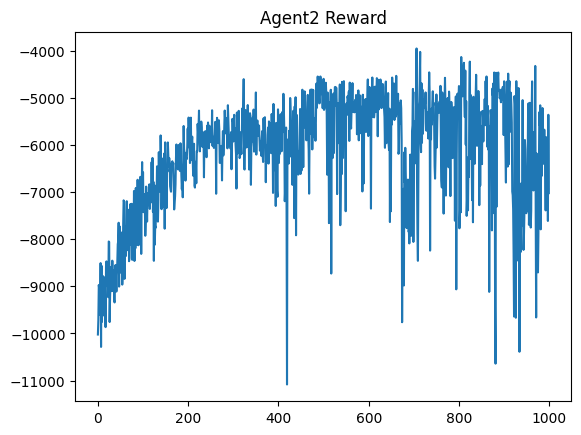

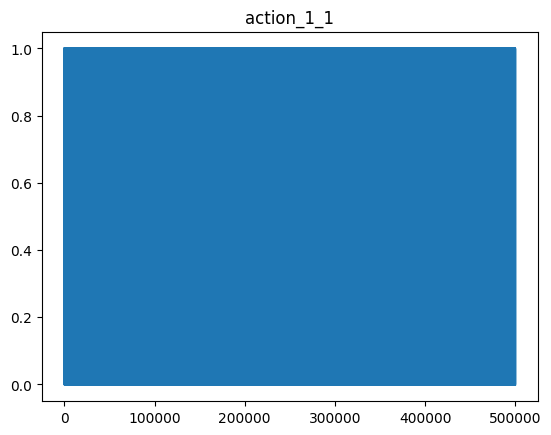

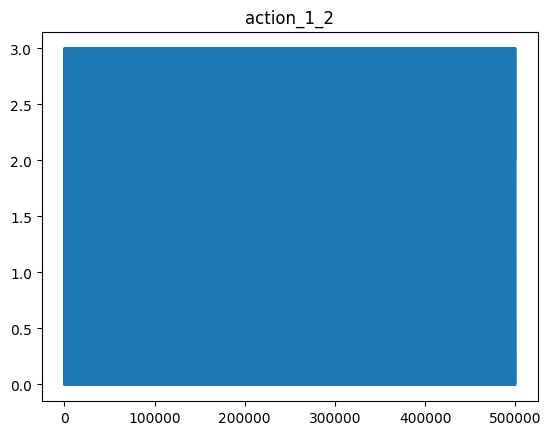

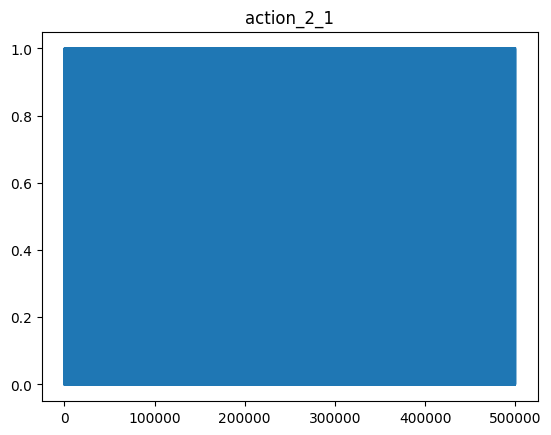

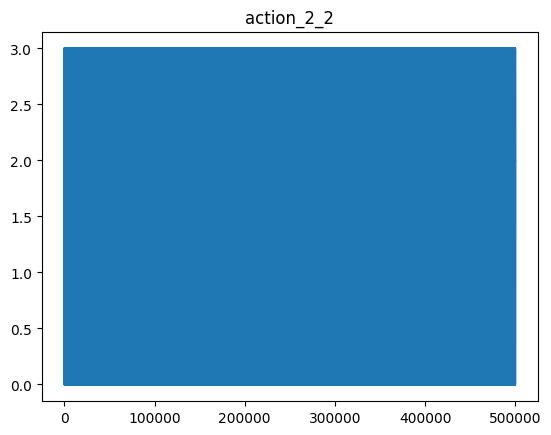

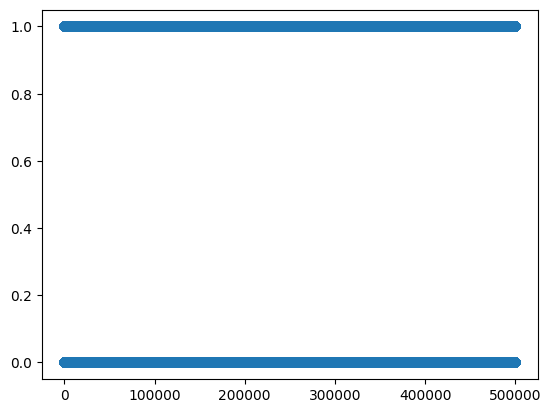

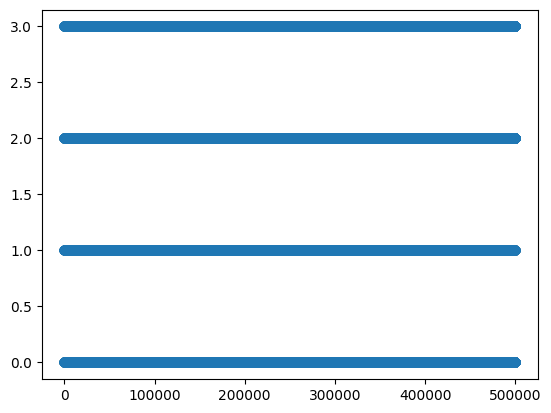

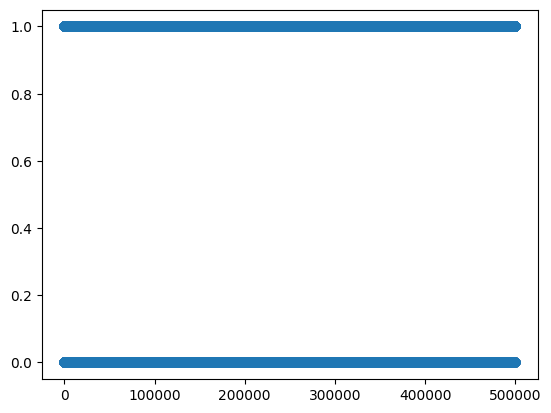

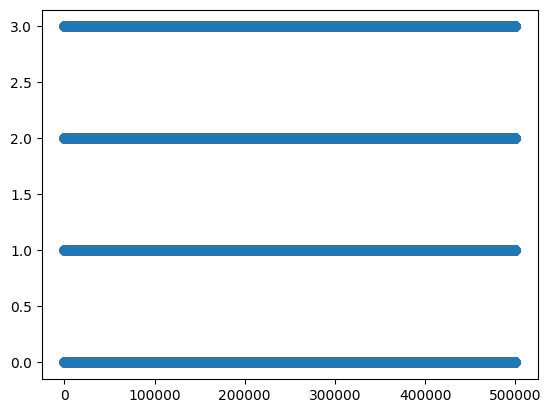

Counter({1: 331195, 0: 168501})
Counter({3: 179792, 2: 147590, 0: 88323, 1: 83991})
Counter({1: 345706, 0: 153990})
Counter({3: 191968, 2: 150022, 0: 79186, 1: 78520})


In [ ]:
for k, v in statistics.items():
  plt.plot(list(range(len(v))), v)
  plt.title(k)
  plt.show()

plt.scatter(list(range(len(statistics['action_1_1']))), statistics['action_1_1'])
plt.show()
plt.scatter(list(range(len(statistics['action_1_2']))), statistics['action_1_2'])
plt.show()
plt.scatter(list(range(len(statistics['action_2_1']))), statistics['action_2_1'])
plt.show()
plt.scatter(list(range(len(statistics['action_2_2']))), statistics['action_2_2'])
plt.show()

print(Counter(statistics['action_1_1']))
print(Counter(statistics['action_1_2']))
print(Counter(statistics['action_2_1']))
print(Counter(statistics['action_2_2']))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
checkpoint = {
    'model_state_dict': net_1.state_dict()
    # можно добавлять и другие метрики, нужные для ваших экспериментов
}
torch.save(checkpoint, '/content/drive/MyDrive/Работа/net_1.pth')


In [ ]:
checkpoint = {
    'model_state_dict': net_2.state_dict()
    # можно добавлять и другие метрики, нужные для ваших экспериментов
}
torch.save(checkpoint, '/content/drive/MyDrive/Работа/net_2.pth')

In [ ]:
net_1 = DQN(chase.observation_space[0].shape[0], 12).to(device)
net_1.load_state_dict(torch.load('/content/drive/MyDrive/Работа/net_1.pth')['model_state_dict'])

<All keys matched successfully>

In [ ]:
net_2 = DQN(chase.observation_space[0].shape[0], 12).to(device)
net_2.load_state_dict(torch.load('/content/drive/MyDrive/Работа/net_2.pth')['model_state_dict'])

<All keys matched successfully>

In [ ]:
test_ttt = {
    'action_1_1': [],
    'action_1_2': [],
    'action_2_1': [],
    'action_2_2': [],
}

In [ ]:
def test(env, policy_net1, policy_net2, episodes=1, render=True):
    for ep in range(episodes):
        obs = env.reset()
        done = False
        while not done:
            action1 = select_action(obs[0], policy_net1, epsilon=0.0, action_space=env.action_space)
            test_ttt['action_1_1'].append(action1[0])
            test_ttt['action_1_2'].append(action1[1])
            action2 = select_action(obs[1], policy_net2, epsilon=0.0, action_space=env.action_space)
            test_ttt['action_2_1'].append(action2[0])
            test_ttt['action_2_2'].append(action2[1])

            obs, _, done, _ = env.step((action1, action2))
            env.render(to_draw=render)

In [ ]:
test(chase, net_1, net_2, render=False)

In [ ]:
for k,v in test_ttt.items():
  print(k, Counter(v))

action_1_1 Counter({1: 459, 0: 41})
action_1_2 Counter({3: 294, 2: 182, 1: 16, 0: 8})
action_2_1 Counter({1: 474, 0: 26})
action_2_2 Counter({3: 312, 2: 94, 0: 53, 1: 41})


In [ ]:
chase.render_animation()

Output hidden; open in https://colab.research.google.com to view.